In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import os

DATASET_IMAGE_DIRECTORY = "../dataset/images/"
DATASET_LABEL_DIRECTORY = "../dataset/labels/"
DATASET_DIRECTORY = "../dataset/"

In [31]:
def get_render(df : pd.DataFrame, img_file_name : str):
    img_file = os.path.join(DATASET_IMAGE_DIRECTORY, img_file_name)   
    img = cv2.imread(img_file, 0)
    line = 0
    
    df_render = df[(df.filename == img_file_name)]
    for index, row in df_render.iterrows():
        line = line + 1

        if row['area_object'] <= 600:
            continue

        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (int(row['xmin']), int(row['ymin'] - 5))
        fontScale              = 0.5
        fontColor              = (0,255,0)
        lineType               = 2

        cv2.putText(img, str(line) + "." + str(row['className']), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)

        cv2.rectangle(img, (row['xmin'], row['ymin']),(row['xmax'], row['ymax']),(0,255,0),3)
        
    del df_render
    plt.imshow(img)
    plt.title('Imagem (%s)' % img_file_name)
    plt.show()
    cv2.imwrite('d:/temp/output_%s.jpg' % img_file_name, img)
    cv2.destroyAllWindows()

In [32]:
df = pd.read_csv(os.path.join(DATASET_DIRECTORY, 'dataset.csv'))

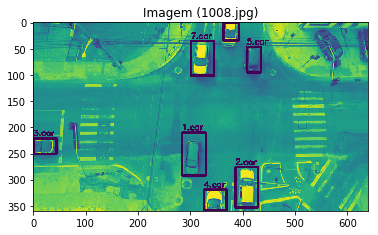

In [33]:
for index, row in df.iterrows():
    get_render(df, row['filename'])
    break

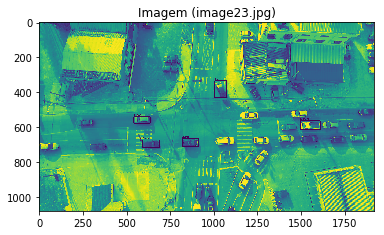

In [34]:
get_render(df, 'image23.jpg')